In [28]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
hp=pd.read_excel('hp_data.xlsx')
hp.head()

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
0,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1,6300000
1,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000
2,Whitefield,Super built-up Area,1019,Resale,1,2,5,2,3800000
3,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4,10500000
4,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000


In [48]:
x=hp[['sqft','yearsOld','totalFloor','bhk']]
y=hp['price']

In [49]:
print(x,y)

      sqft  yearsOld  totalFloor  bhk
0     1450         5           4    1
1     2190         5           5    3
2     1019         1           5    2
3     1857        15           5    4
4     2190         5           5    3
...    ...       ...         ...  ...
3495  1019         1           5    2
3496  1450         5           4    1
3497  1330        10           4    1
3498  1200        10           4    1
3499  1019         1           5    2

[3500 rows x 4 columns] 0        6300000
1       11500000
2        3800000
3       10500000
4       11500000
          ...   
3495     3800000
3496     6300000
3497     7350000
3498     4800000
3499     3800000
Name: price, Length: 3500, dtype: int64


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=78)

In [51]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = model.predict(x_test)
print(y_pred)

[ 1517911.20237326  1517911.20237326  3834457.12498845  7523289.88574888
  3834457.12498845 12716681.50044788  3834457.12498845 13440782.1994499
  8777507.64194691  9595513.65666517  3834457.12498845 12716681.50044788
  7850699.25140944  1517911.20237326  5996907.75729582  8777507.64194691
  7523289.88574888 13440782.1994499   9595513.65666517 13440782.1994499
  7523289.88574888  9595513.65666517  8777507.64194691  7523289.88574888
 12716681.50044788  5996907.75729582 12716681.50044788  9595513.65666517
  3834457.12498845  6413462.58614709 12716681.50044788  7850699.25140944
  7850699.25140944  7850699.25140944 12716681.50044788  6413462.58614709
  1517911.20237326  8777507.64194691  7523289.88574888 13440782.1994499
  5996907.75729582  8777507.64194691  9595513.65666517  7523289.88574888
  8777507.64194691 17035588.48993706 13440782.1994499   5996907.75729582
  6413462.58614709  1517911.20237326  9595513.65666517  6413462.58614709
  7523289.88574888  3834457.12498845 12716681.50044788

In [53]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(r2)
print(mse)

0.8673649207984122
3523450489882.1655


In [54]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='price', ylabel='Density'>

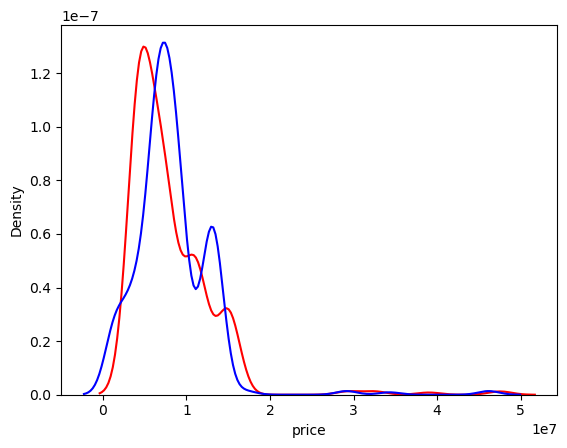

In [55]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" )

<Axes: xlabel='price'>

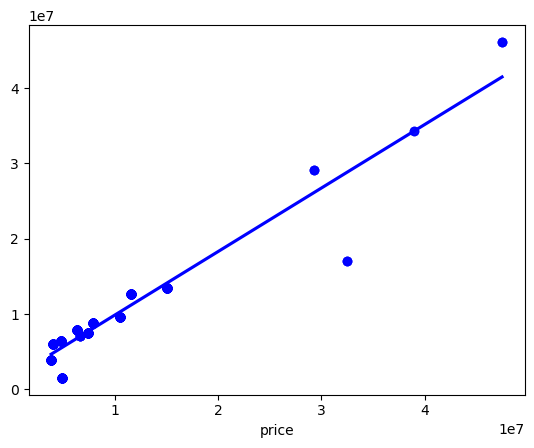

In [56]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

In [65]:
new_data = pd.DataFrame([
    {'sqft':2000,'yearsOld':5,'totalFloor':4,'bhk':3}])

In [66]:
new_data

,sqft,yearsOld,totalFloor,bhk
0,2000,5,4,3


In [67]:
predicted_price = model.predict(new_data)

In [68]:
print(predicted_price)

[9201330.96884717]
